# 🚀 Showcase

This is notebook with example usage of pykirill package

In [ ]:
# Install pykirill package from the pca feature branch with pca optional dependencies

%pip install "pykirill[pca] @ git+https://github.com/kirilledition/pykirill.git@pca"

In [1]:
import seaborn as sns
from pykirill import plotting, transforms

plotting.setup()

INFO:pykirill.plotting:Arial font is available and has been set as the default font.
INFO:pykirill.plotting:Before embarking on a journey, 🐗 pykirill foretells a WE'RE REALLY SO BACK mood...


In [2]:
# Load example dataset

dataset = sns.load_dataset("iris")
data = dataset.drop(columns=["species"])
target = dataset["species"]

In [3]:
# Transform data and perform PCA

scaled_data = data.apply(transforms.log_scale)
pca = transforms.principal_component_analysis(scaled_data, n_components=3)
pca

PrincipalComponentAnalysisResult (
	N components: 3
	Explained variance: 0.99
	Scores shape: (150, 3)
	Loadings shape: (4, 3)
)

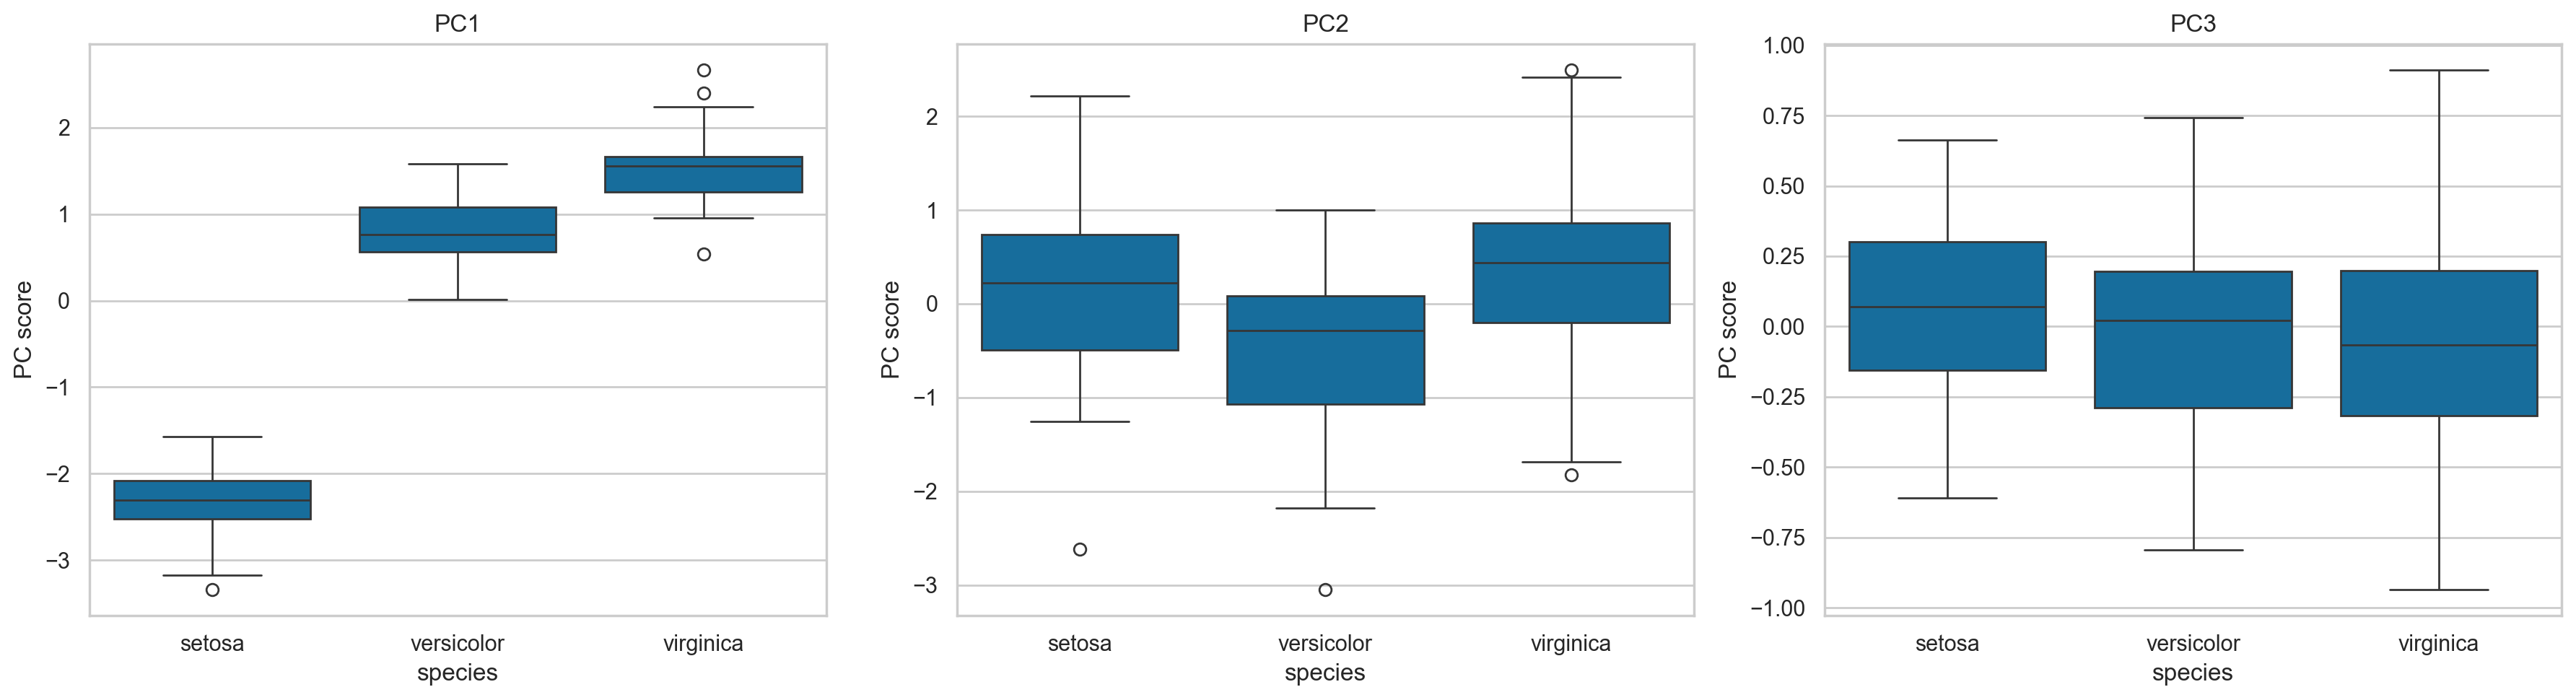

In [4]:
axm = plotting.SubplotsManager(3)

for pc, score in pca.scores.items():
    ax = axm.nextax()

    ax.set_title(pc)
    ax.set_ylabel("PC score")
    ax.set_xlabel("species")

    sns.boxplot(x=target, y=score, ax=ax)

axm.show()